In [1]:
from src.data import load_data
from src.models import util_model
from src.data import util

In [2]:
image_name = "trans011" 
front_image_name = image_name + "-1"
back_image_name = image_name + "-2"
front_image_path = "data/raw/front"
back_image_path = "data/raw/back"
front_image = load_data.read_image(front_image_path, front_image_name)
back_image = load_data.read_image(back_image_path, back_image_name)

In [3]:
front_section_dict = util_model.detect_section(front_image, util_model.front_model)
pf_sections = util.pre_process(front_section_dict)
front_text_dict = util_model.images_to_texts(pf_sections)
courses_df = util.make_course(front_text_dict)
error_df = util.get_error(courses_df)
error_df


0: 640x416 3 sections, 802.6ms
Speed: 3.0ms preprocess, 802.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 416)
Error from get_courseID
กอ   ธ33101 ภาษายังกฤษ 5                             10   4
Error from get_courseID
ญญ   ห32212 ภาษาเพื่อพัฒนาทักษะการเขียน           05   4
Error from get_courseID
ญญ  ห31212 สื่อสารเชิงสร้างสรรค์ 2                    0.5   4


,ocr,numeric,section,ref,id,name,unit,grade
7,กอ ธ33101 ภาษายังกฤษ 5 ...,3311 5 1 4,007,กอ,999,ภาษายังกฤษ,1.0,4.0
58,ญญ ห32212 ภาษาเพื่อพัฒนาทักษะการเขียน ...,32212 5 4,130,ญญ,999,ภาษาเพื่อพัฒนาทักษะการเขียน,0.5,4.0
84,คข (ท31102 ภาษาไทย 2 ...,2,219,คข,ท31102,ภาษาไทย,999.0,999.0
96,ญญ ห31212 สื่อสารเชิงสร้างสรรค์ 2 ...,31212 2 55 4,231,ญญ,999,สื่อสารเชิงสร้างสรรค์,0.5,4.0
98,ญท ว31202 พิสิกส์ 2 ...,3122 2,233,ญท,ว31202,พิสิกส์,999.0,2.0


In [4]:
post_courses_df = util.post_process(courses_df, pf_sections)
post_error_df = util.get_error(post_courses_df).reset_index(drop=True)
post_error_df

Error from get_courseID
กอ   ธ33101 ภาษายังกฤษ 5                           10   4
Error from get_courseID
ขว   ห33102 ภาษาไทย 6                                 10   35
Error from get_courseID
กท        01 สังคมศึกษา 5                        10 4
Error from get_courseID
ขว   ห33102 ภาษาไทย 6                                 10   35
Error from get_courseID
ญญ   ห32212 ภาษาเพื่อพัฒนาทักษะการเขียน           05   4
Error from get_courseID
คย  สี32112 พระพุทธศาสนา 4                       แ-
Error from get_courseID
ญญ   ห32212 ภาษาเพื่อพัฒนาทักษะการเขียน           05   4
Error from get_courseID
ญญ   ห32212 ภาษาเพื่อพัฒนาทักษะการเขียน           05  4
Error from get_courseID
ญญ   ห32212 ภาษาเพื่อพัฒนาทักษะการเขียน           05  4
Error from get_courseID
ญท   232202 ฟิสิกส์ 8                        20   4
Error from get_courseID
ญญ  ห31212 สื่อสารเชิงสร้างสรรค์ 2                    0.5   4
Error from get_courseID
ญญ  ห31212 สื่อสารเชิงสร้างสรรค์ 2                    0.5   4
Error from get_courseI

,ocr,numeric,section,ref,id,name,unit,grade
0,คข (ท31102 ภาษาไทย 2 ...,2,219,คข,ท31102,ภาษาไทย,999.0,999.0
1,ญท ว31202 พิสิกส์ 2 ...,3122 2,233,ญท,ว31202,พิสิกส์,999.0,2.0


In [5]:
post_error_df.ocr.to_list()

["คข (ท31102 ภาษาไทย 2                                  '",
 "ญท  ว31202 พิสิกส์ 2                                '"]

In [6]:
back_section_dict = util_model.detect_section(back_image, util_model.back_model)
pb_sections = util.pre_process(back_section_dict)
back_text_dict = util_model.images_to_texts(pb_sections)
gpa = util.get_GPA(back_text_dict[0])
gpa


0: 640x448 1 section, 807.5ms
Speed: 4.0ms preprocess, 807.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 448)
Error from get_numeric
กว การศึกษาค้นคว้าด้วยตนเอง (5)   ด


,ocr,category,unit,grade
0,กก ภาษาไทย 90 369,ภาษาไทย,0.90,3.69
1,กข คณิตศาสตร์ 15.0 3.73,คณิตศาสตร์,15.00,3.73
2,กค วิทยาศาสตร์และเทคโนโลยี 40.0 3.77,วิทยาศาสตร์,40.00,3.77
3,กญ สังคมศึกษา ศาสนา และวัฒนธรรม 110 3.77,สังคมศึกษา,1.10,3.77
4,กฐ สุขศึกษาและพลศึกษา 6.0 4.00,สุขศึกษา,6.00,4.00
5,กท ศิลปะ 4.0 393,ศิลปะ,4.00,3.93
6,กย การงานอาชีพ 2.0 4.00,การงานอาชีพ,2.00,4.00
7,กพ ภาษาต่างประเทศ 15.0 4.00,ภาษาต่างประเทศ,15.00,4.00
8,กว การศึกษาค้นคว้าด้วยตนเอง (5) ด,ศึกษาค้นคว้าด้วยตนเอง,9.99,999.00
9,กอ ผลการเรียนเฉลี่ยตลอดหลักสูตร 102.0 3.81,ผลการเรียน,1.02,3.81


In [7]:
front_edf = post_courses_df[["section", "id", "name", "unit", "grade"]]
back_edf = gpa[["category", "unit", "grade"]]

In [8]:
front_edf

,section,id,name,unit,grade
0,000,ท33101,ภาษาไทย,1.0,4.0
1,001,ค33111,คณิตศาสตร์,1.0,4.0
2,002,ว33111,วิทยาศาสตร์พื้นฐาน,1.0,4.0
3,003,ว33121,เทคโนโลยี,0.5,4.0
4,004,ส33111,พระพุทธศาสนา,0.5,4.0
...,...,...,...,...,...
98,233,ว31202,พิสิกส์,999.0,2.0
99,234,ว31222,เคมี,1.5,3.0
100,235,ว31242,ชีววิทยา,2.0,0.5
101,236,ส30232,หน้าที่พลเมือง,0.5,4.0


In [9]:
back_edf

,category,unit,grade
0,ภาษาไทย,0.90,3.69
1,คณิตศาสตร์,15.00,3.73
2,วิทยาศาสตร์,40.00,3.77
3,สังคมศึกษา,1.10,3.77
4,สุขศึกษา,6.00,4.00
5,ศิลปะ,4.00,3.93
6,การงานอาชีพ,2.00,4.00
7,ภาษาต่างประเทศ,15.00,4.00
8,ศึกษาค้นคว้าด้วยตนเอง,9.99,999.00
9,ผลการเรียน,1.02,3.81


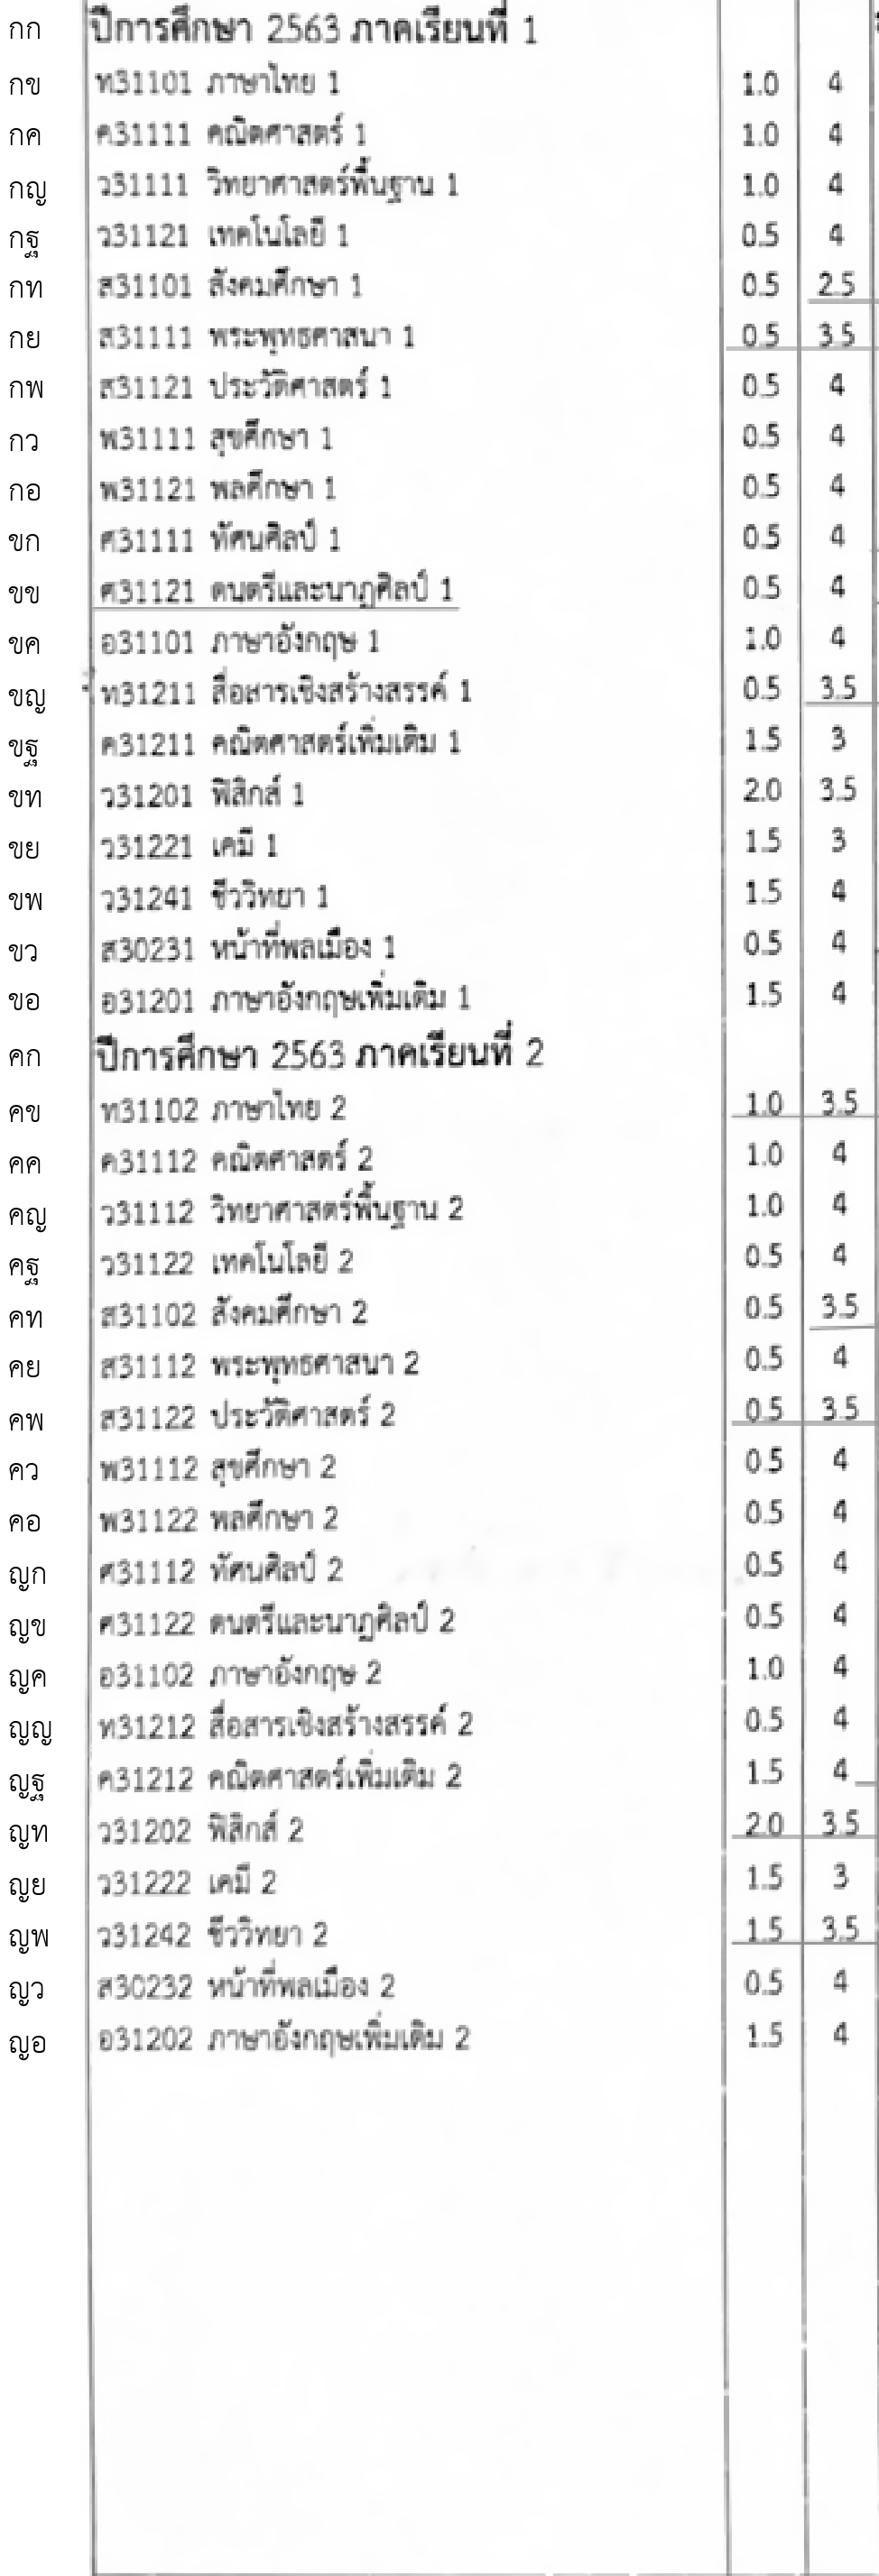

In [10]:
pf_sections[2]